In [256]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy as ap
import pandas as pd
import astropy.cosmology as apc
from astropy.cosmology import Planck18
import bagpipes as pp
import astropy.units as u
import kcorrect
from astropy.io import fits
from mpl_toolkits.mplot3d import axes3d
from astropy.cosmology import FlatLambdaCDM

c = 3e18    #A * Hz
cosmo = FlatLambdaCDM(H0=100, Om0=0.3, Tcmb0=2.725)

In [257]:
try:
    df = pd.read_csv("~/Desktop/MT/galaxies_for_test_dr8.csv")
except Exception as err:
    print(err)
    df = pd.read_csv(f"galaxies_for_test_dr8.csv")

magmask = np.sum(df[[f"modelmagErr_{i}" for i in 'ugriz' ] + [f"modelmag_{i}" for i in 'ugriz' ]] <= 0, axis=1 )> 0

zmask = df['z_err']/df['z'] > 1.0

fluxmask_low = np.sum(df[[f"modelFlux_{i}" for i in 'ugriz'] + [f"modelmag_{i}" for i in 'ugriz']] <= 0, axis = 1) > 0

fluxmask_high = np.sum(df[[f"modelFlux_{i}" for i in 'ugriz'] + [f"modelmag_{i}" for i in 'ugriz']] >= 1e4, axis = 1) > 0

mask_total = magmask | zmask | fluxmask_low | fluxmask_high

df1 =df[~mask_total]

In [258]:
df[mask_total].iloc[:,5:22]

,z,z_err,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelmagErr_u,modelmagErr_g,modelmagErr_r,modelmagErr_i,modelmagErr_z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z
86,0.022632,0.000012,15.364841,13.649011,12.793226,12.369597,11.987732,0.006832,0.001987,0.001745,0.001728,0.002333,714.601074,3470.528560,7633.249510,11276.160000,16029.030000
481,0.279749,0.000043,25.053064,19.506065,17.993624,17.395344,17.007627,1.624584,0.019796,0.009187,0.008176,0.019080,-0.110587,15.760130,63.467178,110.118797,157.376221
569,0.260025,0.000080,25.131569,20.596682,18.884460,18.302139,17.879955,1.366802,0.045527,0.016148,0.014409,0.035687,-0.132663,5.770614,27.938786,47.768143,70.464493
795,0.312040,0.000122,24.735315,20.333082,18.881460,18.241163,17.922235,2.552615,0.052155,0.022235,0.018951,0.056152,-0.025990,7.357029,28.016113,50.527660,67.772591
1045,0.192198,0.205485,20.378368,18.517267,17.843019,17.572111,17.501253,0.135691,0.014537,0.011806,0.014272,0.043842,7.054757,39.182350,72.910629,93.573669,99.879181
1131,0.034599,0.000010,24.634722,17.786098,17.138332,24.361835,16.954773,2.313853,0.005837,0.004898,2.178454,0.014891,-0.000011,76.835167,139.529800,-0.000006,165.227402
1149,0.019468,0.000010,28.778013,30.040543,15.404491,14.779990,26.923937,0.998706,0.502187,0.012892,0.012980,1.017145,-6.356981,-8.407224,688.975220,1224.627560,-32.196533
1300,0.046290,0.000021,14.370488,18.628775,13.808101,13.426588,11.726489,0.004002,0.118133,0.002072,0.003027,0.002654,1785.685180,35.357956,2997.504880,4259.559080,20389.390000
1350,0.015904,0.000019,25.789513,21.955713,20.404182,19.478292,19.027424,0.886857,0.134187,0.049927,0.033481,0.083816,-0.357238,1.645970,6.889625,16.166985,24.469980
1392,0.328470,0.000075,24.825314,20.474957,18.686361,18.086508,17.768671,1.656020,0.039360,0.013297,0.011535,0.030552,-0.049416,6.455551,33.531273,58.262985,78.071556


In [259]:
dfab = df1[[f"modelmag_{i}"for i in 'ugriz']].copy()
dfab['modelmag_u'] = dfab.apply(lambda x:  x['modelmag_u'] - 0.04, axis=1)
dfab['modelmag_z'] = dfab.apply(lambda x:  x['modelmag_z'] +0.02, axis=1)
                                                   # # x['modelmag_z']*(1.+0.02),
                                                   # axis=1) => AB corrected magnitude values from SDSS

In [260]:
# data loading for objects
test = df1.iloc[:100,:] # iloc = index location ; syntax are [row, columns]

x = len(test)

_bands = ['modelmag_u', 'modelmag_g','modelmag_r','modelmag_i','modelmag_z']
m_k = test[_bands]            # appmags with k inside    


ab = {'modelmag_u':[-0.04]*x,'modelmag_g':[0]*x,'modelmag_r':[0]*x,'modelmag_i':[0]*x,'modelmag_z':[0.02]*x} # SDSS to AB mapping

#
sdss2ab= pd.DataFrame(data=ab)
m_k = m_k.add(sdss2ab)      # AB corrected magnitude values from SDSS

# AB Corrected magnitude (assuming this was correct before)
m_k = test[[f"modelmag_{i}"for i in 'ugriz']].copy()
m_k['modelmag_u'] = dfab.apply(lambda x:  x['modelmag_u'] - 0.04, axis=1)
m_k['modelmag_z'] = dfab.apply(lambda x:  x['modelmag_z'] + 0.02, axis=1)
                                                   # # x['modelmag_z']*(1.+0.02),
                                                   # axis=1)

_banderrs = ['modelmagErr_u', 'modelmagErr_g','modelmagErr_r','modelmagErr_i','modelmagErr_z']
m_k_errs = test[_banderrs]    # appmag errors

phot_reds = test['z']        # photometric redshifts
phot_reds_err = test['z_err']# redshift errors

_ivars = ['modelFluxivar_u', 'modelFluxivar_g','modelFluxivar_r','modelFluxivar_i','modelFluxivar_z']
ivar_cat = test[_ivars]       # ivars for bands

_absmags = ['absMagU','absMagG','absMagR','absMagI','absMagZ']
absmagtest = test[_absmags]
absmagtest = absmagtest.to_numpy(dtype=float)

_fluxess = ['modelFlux_u','modelFlux_g','modelFlux_r','modelFlux_i','modelFlux_z']
fluxtest = test[_fluxess]    # flux_nu in nanomaggies

_kcorrbands = ['kcorrU','kcorrG','kcorrR','kcorrI','kcorrZ']
k_corr_cat = test[_kcorrbands] # k-correct from catalog
k_corr_cat = k_corr_cat.to_numpy(dtype=float)

sm = test['lgm_tot_p50']    # stellar mass from SDSS
smh = test['lgm_tot_p84']   # upper limit
sml = test['lgm_tot_p16']   # lower limit
sm = sm.to_numpy(dtype=float)
smh = smh.to_numpy(dtype=float)
sml = sml.to_numpy(dtype=float)
smerrup = smh-sm
smerrlo = sm-sml
smtoterr = [smerrlo,smerrup]    # defining total error

d_L = cosmo.luminosity_distance(phot_reds)/u.Mpc # d_L = c/H_0 * z approx.
d_Lerr = cosmo.luminosity_distance(phot_reds_err)/u.Mpc
DM = 25 + 5*np.log10(d_L)
DM = np.broadcast_to(DM.reshape(-1,1), (x,5))
DM_err = 5/(np.log(10)*d_L) * d_Lerr
DM_err = np.broadcast_to(DM_err.reshape(-1,1), (x,5))

# for combination
m_k_errs = m_k_errs.rename(columns={"modelmagErr_u":"modelmag_u", "modelmagErr_g":"modelmag_g","modelmagErr_r":"modelmag_r","modelmagErr_i":"modelmag_i","modelmagErr_z":"modelmag_z"})

Test for my fluxes vs. catalog fluxes

In [261]:
f_nu_k = 10**(-0.4*m_k)        # 'dirty' appmags -> 'dirty' maggies

# from std error propagation
err_fnu = m_k_errs * 0.4 * np.log(10) * 10**(-0.4*m_k) # from f_err**2 = |df/dm|**2 m_err**2 
err_fnu = err_fnu.rename(columns={"modelmag_u":"modelmagErr_u", "modelmag_g":"modelmagErr_g","modelmag_r":"modelmagErr_r","modelmag_i":"modelmagErr_i","modelmag_z":"modelmagErr_z"})

f_nu_kJ = f_nu_k * 10**9 # transform to nanomaggies
f_nu_J = f_nu_kJ.rename(columns={"modelmag_g":"modelFlux_g", "modelmag_r":"modelFlux_r","modelmag_i":"modelFlux_i","modelmag_z":"modelFlux_z","modelmag_u":"modelFlux_u"})

err_fnuJ = err_fnu * 10**9
fluxtest_err = np.sqrt(1/ivar_cat)
fluxtest_err = fluxtest_err.rename(columns={"modelFluxivar_g":"modelmagErr_g", "modelFluxivar_r":"modelmagErr_r",
                                            "modelFluxivar_i":"modelmagErr_i","modelFluxivar_z":"modelmagErr_z","modelFluxivar_u":"modelmagErr_u"})

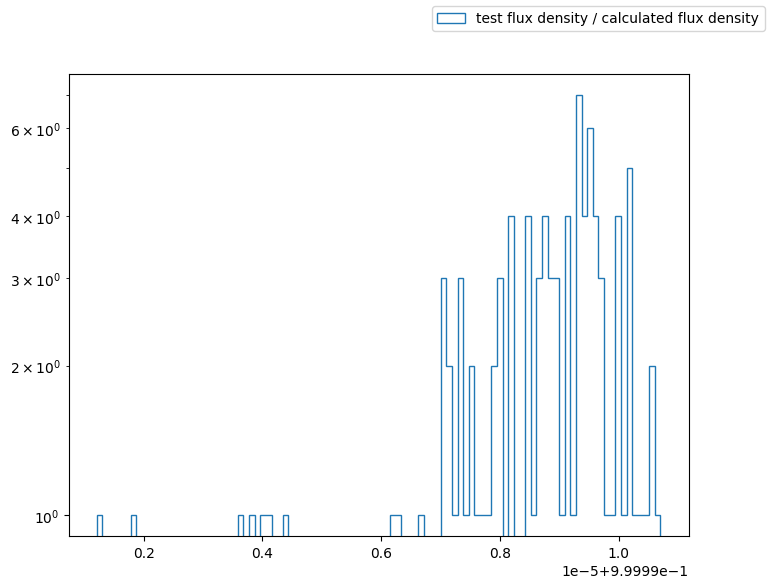

In [262]:
fig, ax = plt.subplots()
plt.hist(fluxtest.iloc[:,2]/f_nu_J.iloc[:,2], log=True, histtype='step', label='test flux density / calculated flux density', bins=100) # flux test
fig.set_size_inches(8,6)
fig.legend()

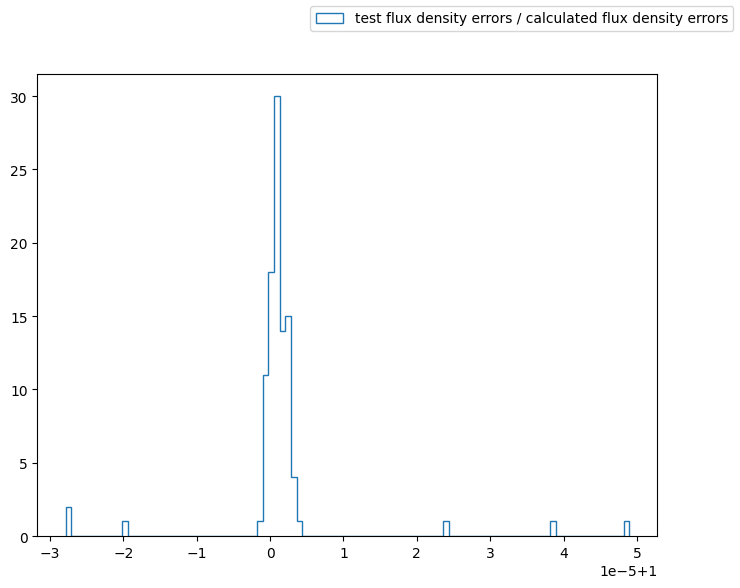

In [263]:
fig, ax = plt.subplots()
plt.hist(fluxtest_err.iloc[:,2]/err_fnuJ.iloc[:,2], histtype= 'step', label='test flux density errors / calculated flux density errors',bins=100) # error test
fig.set_size_inches(8,6)
fig.legend()

# Kcorrect Test

In [264]:
# getting k correction values
responses = ['sdss_u0', 'sdss_g0','sdss_r0','sdss_i0','sdss_z0']
kz = kcorrect.kcorrect.Kcorrect(responses=responses, cosmo=cosmo)

maggies = f_nu_k            # we use our fluxes now that it's confirmed to be the same as the catalog                   
ivar = err_fnu**(-2)

coeffs = kz.fit_coeffs(redshift=phot_reds, maggies=maggies, ivar=ivar)

K = kz.kcorrect(redshift=phot_reds, coeffs=coeffs)       # we have k values to clean out redshift effects from the appmag

M = kz.absmag(redshift=phot_reds, maggies=maggies, ivar=ivar, coeffs=coeffs) # works fine this time around: M = m -DM -K

derived = kz.derived(redshift=phot_reds, coeffs=coeffs)
stellar_mass = derived['mremain']

Manual calculation to test Absolute Magnitude

In [265]:
m_k_calc = m_k.to_numpy(dtype=float)
m_k_errs_calc = m_k_errs.to_numpy(dtype=float)
M_calc = m_k_calc - DM - K
M_calc_err = np.sqrt(m_k_errs_calc**2 + DM_err**2)

stellar_massk = np.log10(stellar_mass)

M_r = M[:,2]
M_r_calc = M_calc[:,2]
absmagtest_r = absmagtest[:,2]
M_calc_err = M_calc_err[:,2]

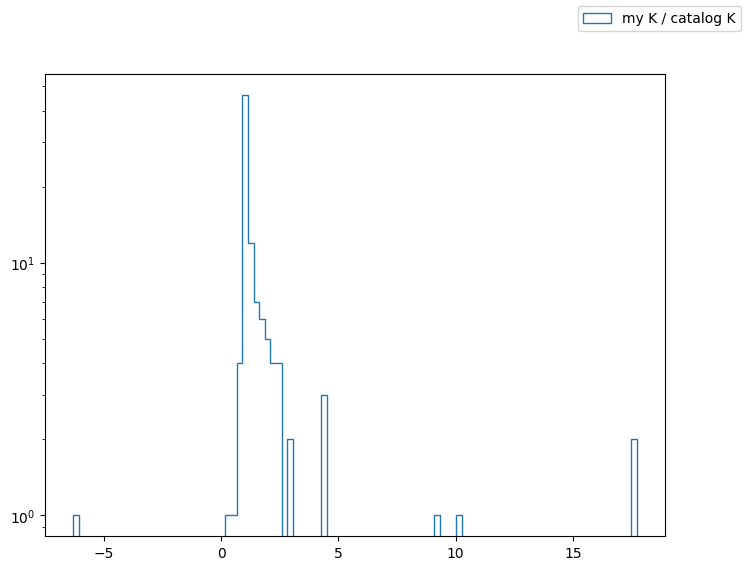

In [266]:
fig, ax = plt.subplots()
plt.hist(K[:,2]/k_corr_cat[:,2], log=True, histtype='step',label='my K / catalog K', bins=100)
fig.set_size_inches(8,6)
fig.legend()

In [267]:
delta_Mr_calc = pd.DataFrame(data=M_r_calc - absmagtest_r, dtype=float)
delta_sm = pd.DataFrame(data=sm - stellar_massk,dtype=float)
delta_M = pd.DataFrame(data=M - absmagtest,dtype=float)

In [268]:
delta_Mr_calc.median()

0    0.047906
dtype: float64

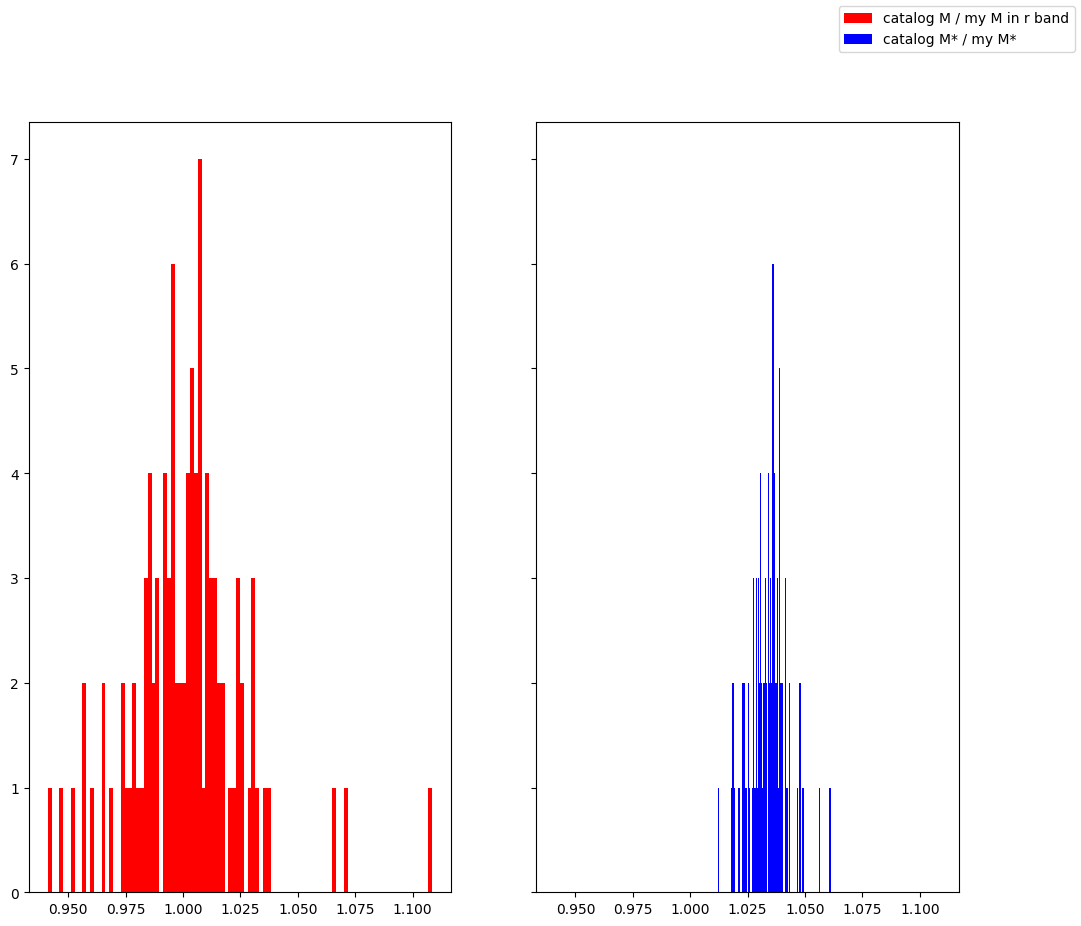

In [269]:
fig, ax = plt.subplots(1,2,sharey=True,sharex=True)
ax[0].hist(absmagtest_r/M_r, histtype='bar',label='catalog M / my M in r band', color='r',bins=100)
ax[1].hist(sm/stellar_massk, histtype='bar', label='catalog M* / my M*', color='b',bins=100)
fig.set_size_inches(12,10)
fig.legend()

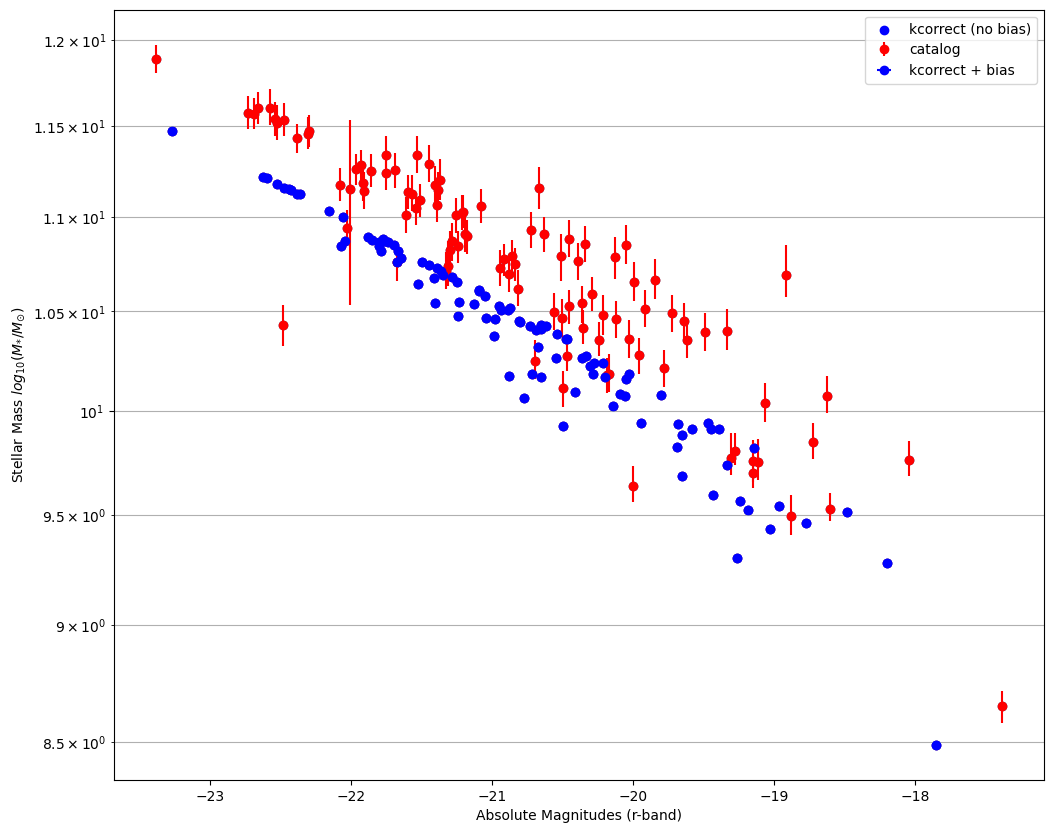

In [270]:
fig, ax = plt.subplots()
plt.scatter(absmagtest_r, sm)
plt.errorbar(absmagtest_r, sm, yerr=smtoterr,  fmt="o", c='r', label='catalog')
plt.scatter(M_r_calc, stellar_massk)
plt.errorbar(M_r_calc, stellar_massk, xerr=M_calc_err, fmt='o', c='b', label='kcorrect + bias')
plt.scatter(M_r, stellar_massk, marker='o', c='b', label='kcorrect (no bias)')

ax.set_yscale('log')
ax.set_xscale('linear')

ax.legend()
ax.set_ylabel(r'Stellar Mass $log_{10}(M_{*}/M_{\odot})$')
ax.set_xlabel('Absolute Magnitudes (r-band)')

ax.grid(axis='y',which='both')
fig.set_size_inches(12,10)
plt.show()

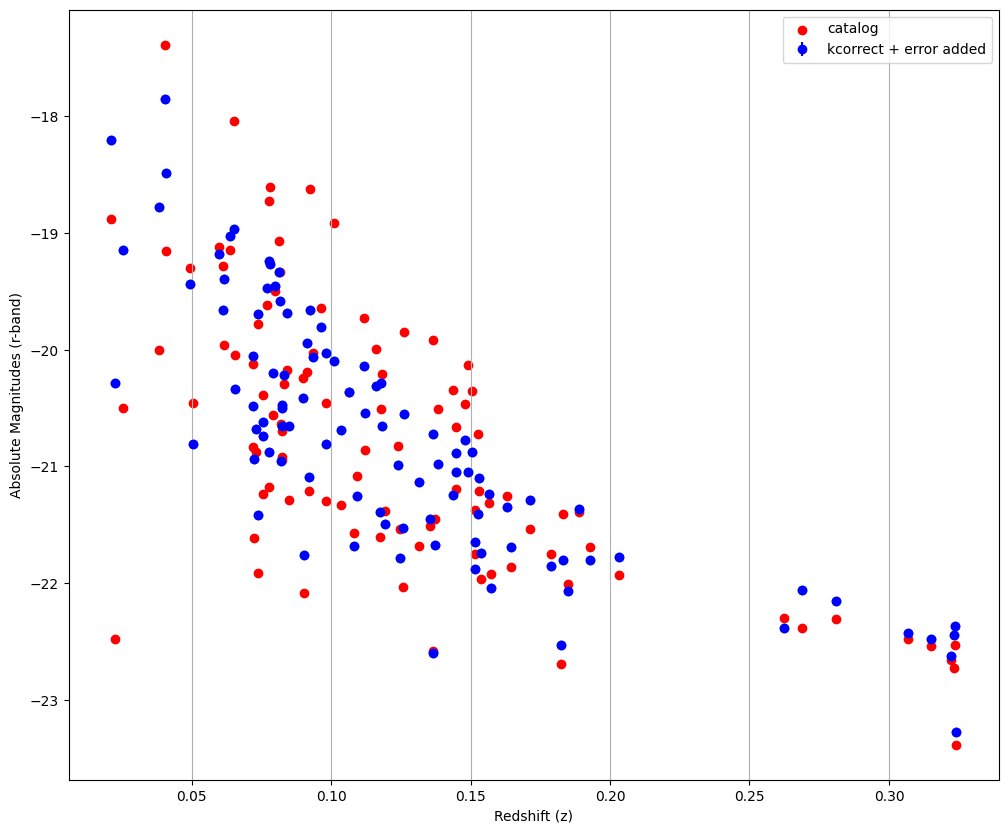

In [271]:
fig, ax = plt.subplots()

plt.scatter(phot_reds, absmagtest_r, marker="o", c='r', label='catalog')
plt.scatter(phot_reds, M_r_calc)
plt.errorbar(phot_reds, M_r_calc, yerr=M_calc_err, fmt='o', c='b', label='kcorrect + error added')

ax.set_yscale('linear')
ax.set_xscale('linear')

ax.legend()
ax.set_xlabel('Redshift (z)')
ax.set_ylabel('Absolute Magnitudes (r-band)')

ax.grid(axis='x')

fig.set_size_inches(12,10)
plt.show()

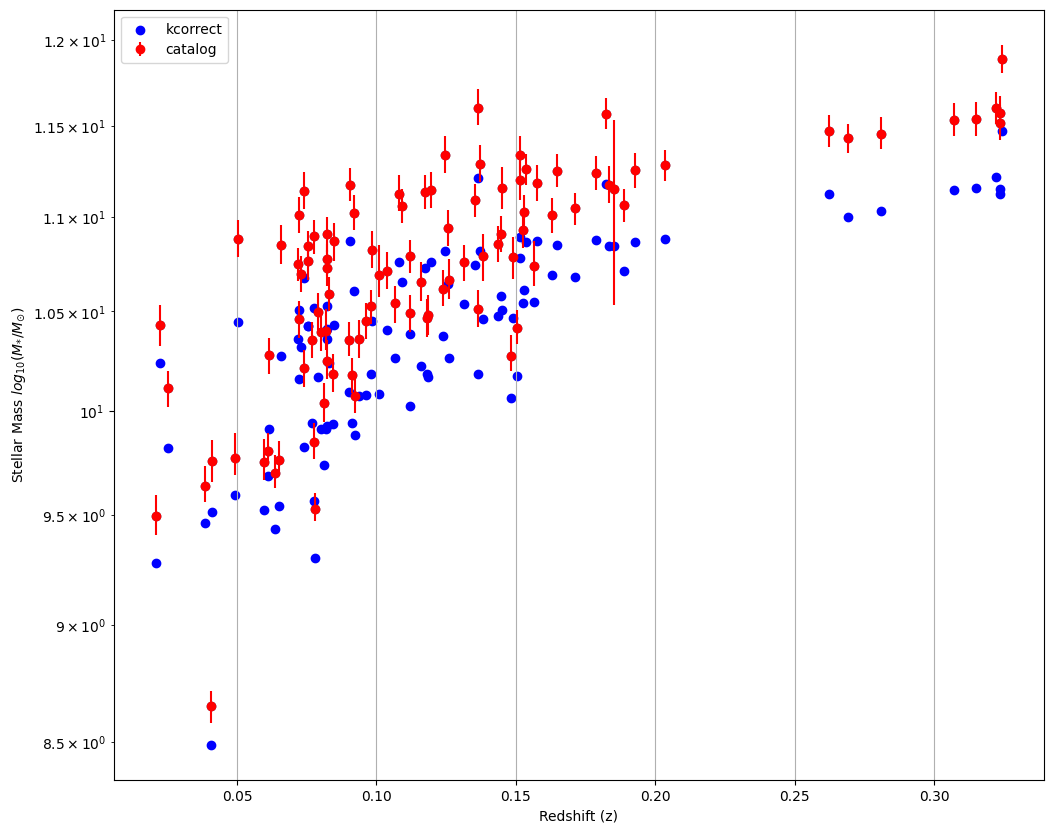

In [272]:
fig, ax = plt.subplots()
plt.scatter(phot_reds, sm)
plt.errorbar(phot_reds, sm, yerr=smtoterr, fmt="o", c='r', label='catalog')
ax1 = ax.scatter(phot_reds, stellar_massk, marker='o', c='b', label='kcorrect')

ax.set_yscale('log')
ax.set_xscale('linear')

ax.legend()
ax.set_ylabel(r'Stellar Mass $log_{10}(M_{*}/M_{\odot})$')
ax.set_xlabel('Redshift (z)')
ax.grid(axis='x')

fig.set_size_inches(12,10)
plt.show()